In [1]:
from utils import *
from augment.MultiPartAugmentor import MultiPartAugmentor

## Input images

In [2]:
data_folder = './data/IPPN_full/'

In [3]:
background_1 = read('./data/background/soil_brown.jpg')
background_2 = read('./data/background/soil_black.jpg')

In [4]:
images_path, masks_path = get_data_list(data_folder)

In [5]:
images = [read(f) for f in images_path]
masks = [read(f) for f in masks_path]

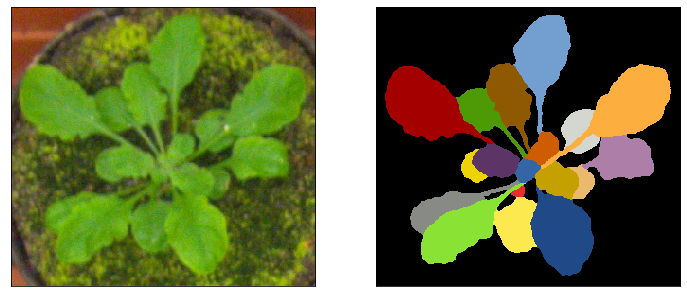

In [6]:
for i in range(len(images)):
    show([images[i], masks[i]])
    break

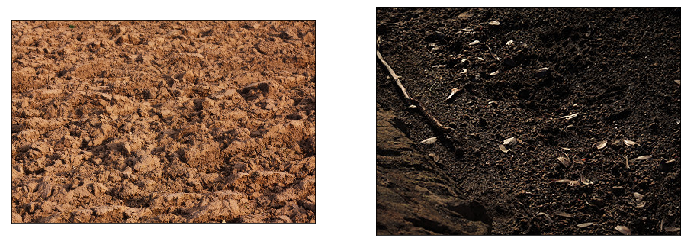

In [7]:
show([background_1, background_2])

In [8]:
background = [background_1, background_2]

In [9]:
background_1.shape

(410, 615, 3)

In [10]:
mpa = MultiPartAugmentor({
    'output_type_list': ['single', 'multi-object', 'multi-part', 'class'],
    'overlap_ratio': 0.3,
    'persp_trans': 0.2,
    'max_rotate_degree': 30,
    'flip_prob': 0.5,
    'background': 'img',
    'background_image_list': background,
    'flip_prob': 0.5,
    'max_rotate_degree': 30,
    'salt': 0.01,
    'pepper': 0.01,
    'gauss_var': 0,
    'smooth_kernel_size': 5,
    'bboxes': True,
    'num_classes': 10
})

In [11]:
transformed = mpa.transform(images, masks, class_list=[0, 0, 1, 1, 1, 2])

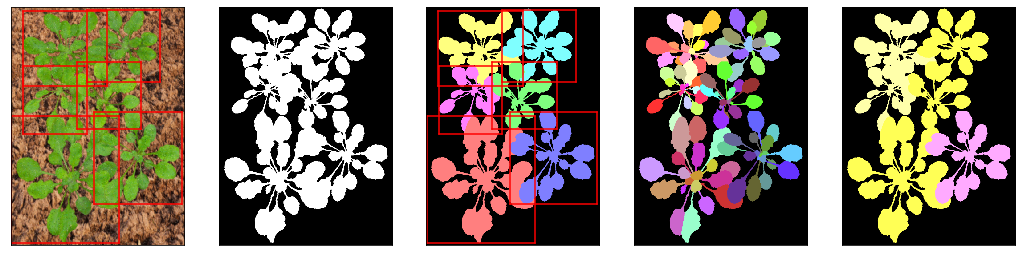

In [12]:
show_line(
    [transformed['scene'], 
     transformed['masks']['single'], 
     transformed['masks']['multi-object'], 
     transformed['masks']['multi-part'],
     transformed['masks']['class']
    ],
    
    [transformed['bboxes']['multi-object'], 
     None, 
     transformed['bboxes']['multi-object'], 
     None,
     None]
)

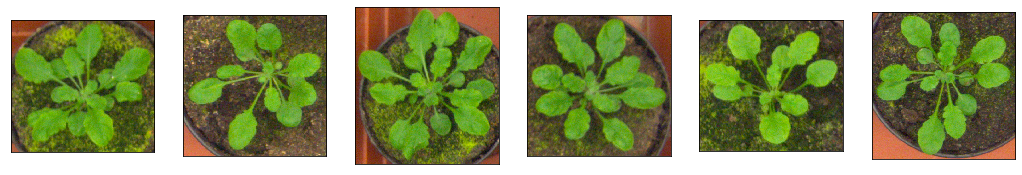

In [13]:
show_line(images)

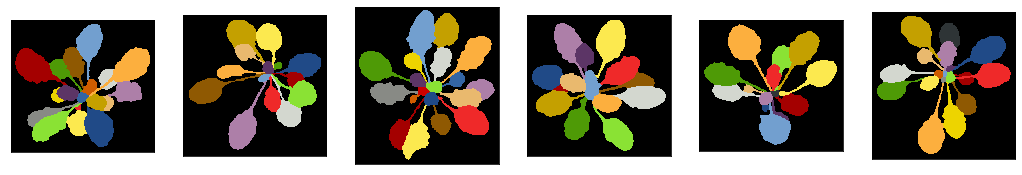

In [14]:
show_line(masks)

In [15]:
sinle_chan_masks = [color_mask(mask, [255, 255, 255]) for mask in masks]

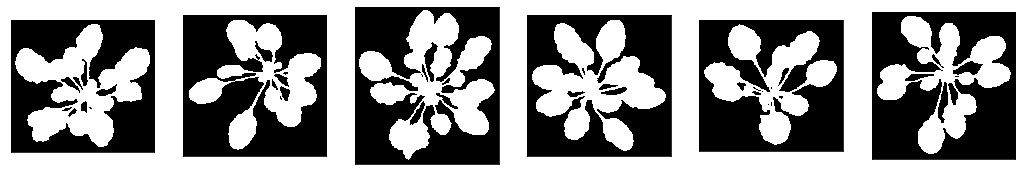

In [16]:
show_line(sinle_chan_masks)

In [17]:
single_mpa = MultiPartAugmentor({
    'output_type_list': ['single', 'multi-object', 'class'],
    'overlap_ratio': 0.0,
    'persp_trans': 0,
    'max_rotate_degree': 30,
    'flip_prob': 0.5,
    'background': 'img',
    'background_image_list': background,
    'max_rotate_degree': 30,
    'salt': 0.01,
    'pepper': 0.01,
    'gauss_var': 0,
    'smooth_kernel_size': 5,
    'bboxes': True,
    'num_classes': 10
})

In [18]:
single_transformed = single_mpa.transform(images, sinle_chan_masks, class_list=[0, 0, 10, 1, 1, 2])

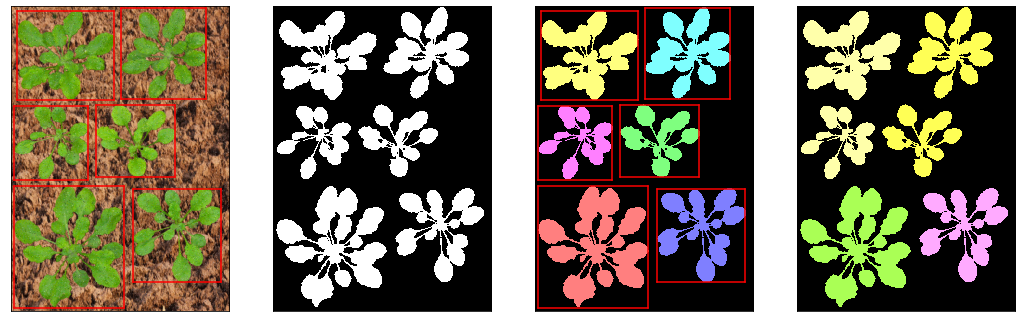

In [19]:
show_line(
    [single_transformed['scene'], 
     single_transformed['masks']['single'], 
     single_transformed['masks']['multi-object'],
     single_transformed['masks']['class']
    ],
    
    [single_transformed['bboxes']['multi-object'], 
     None, 
     single_transformed['bboxes']['multi-object'],
    None]
)